In [13]:
import pandas as pd
import numpy as np
import missingno

# 1.pandas中的缺失值

In [2]:
s = pd.Series([np.nan, None, pd.NA])
s

0     NaN
1    None
2    <NA>
dtype: object

In [4]:
s.isna()

0    True
1    True
2    True
dtype: bool

In [5]:
s.isnull()

0    True
1    True
2    True
dtype: bool

# 2.加载数据中包含缺失值

In [7]:
df = pd.read_csv("../data/weather_withna.csv")
df.tail(5)

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,NaN,NaN,NaN,NaN,NaN
1457,2015-12-28,NaN,NaN,NaN,NaN,NaN
1458,2015-12-29,NaN,NaN,NaN,NaN,NaN
1459,2015-12-30,NaN,NaN,NaN,NaN,NaN
1460,2015-12-31,20.6,12.2,5.0,3.8,rain


In [9]:
df = pd.read_csv("../data/weather_withna.csv", keep_default_na=False)
df.tail(5)

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,,,,,
1457,2015-12-28,,,,,
1458,2015-12-29,,,,,
1459,2015-12-30,,,,,
1460,2015-12-31,20.6,12.2,5.0,3.8,rain


In [10]:
df = pd.read_csv("../data/weather_withna.csv", na_values=[5.0,3.8])
df.tail(5)

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,NaN,NaN,NaN,NaN,NaN
1457,2015-12-28,NaN,NaN,NaN,NaN,NaN
1458,2015-12-29,NaN,NaN,NaN,NaN,NaN
1459,2015-12-30,NaN,NaN,NaN,NaN,NaN
1460,2015-12-31,20.6,12.2,NaN,NaN,rain


# 3.查看缺失值

In [12]:
# 通过isnull()查看缺失值数量
df = pd.read_csv("../data/weather_withna.csv")
df.isnull().sum()

date               0
precipitation    303
temp_max         303
temp_min         303
wind             303
weather          303
dtype: int64

<Axes: >

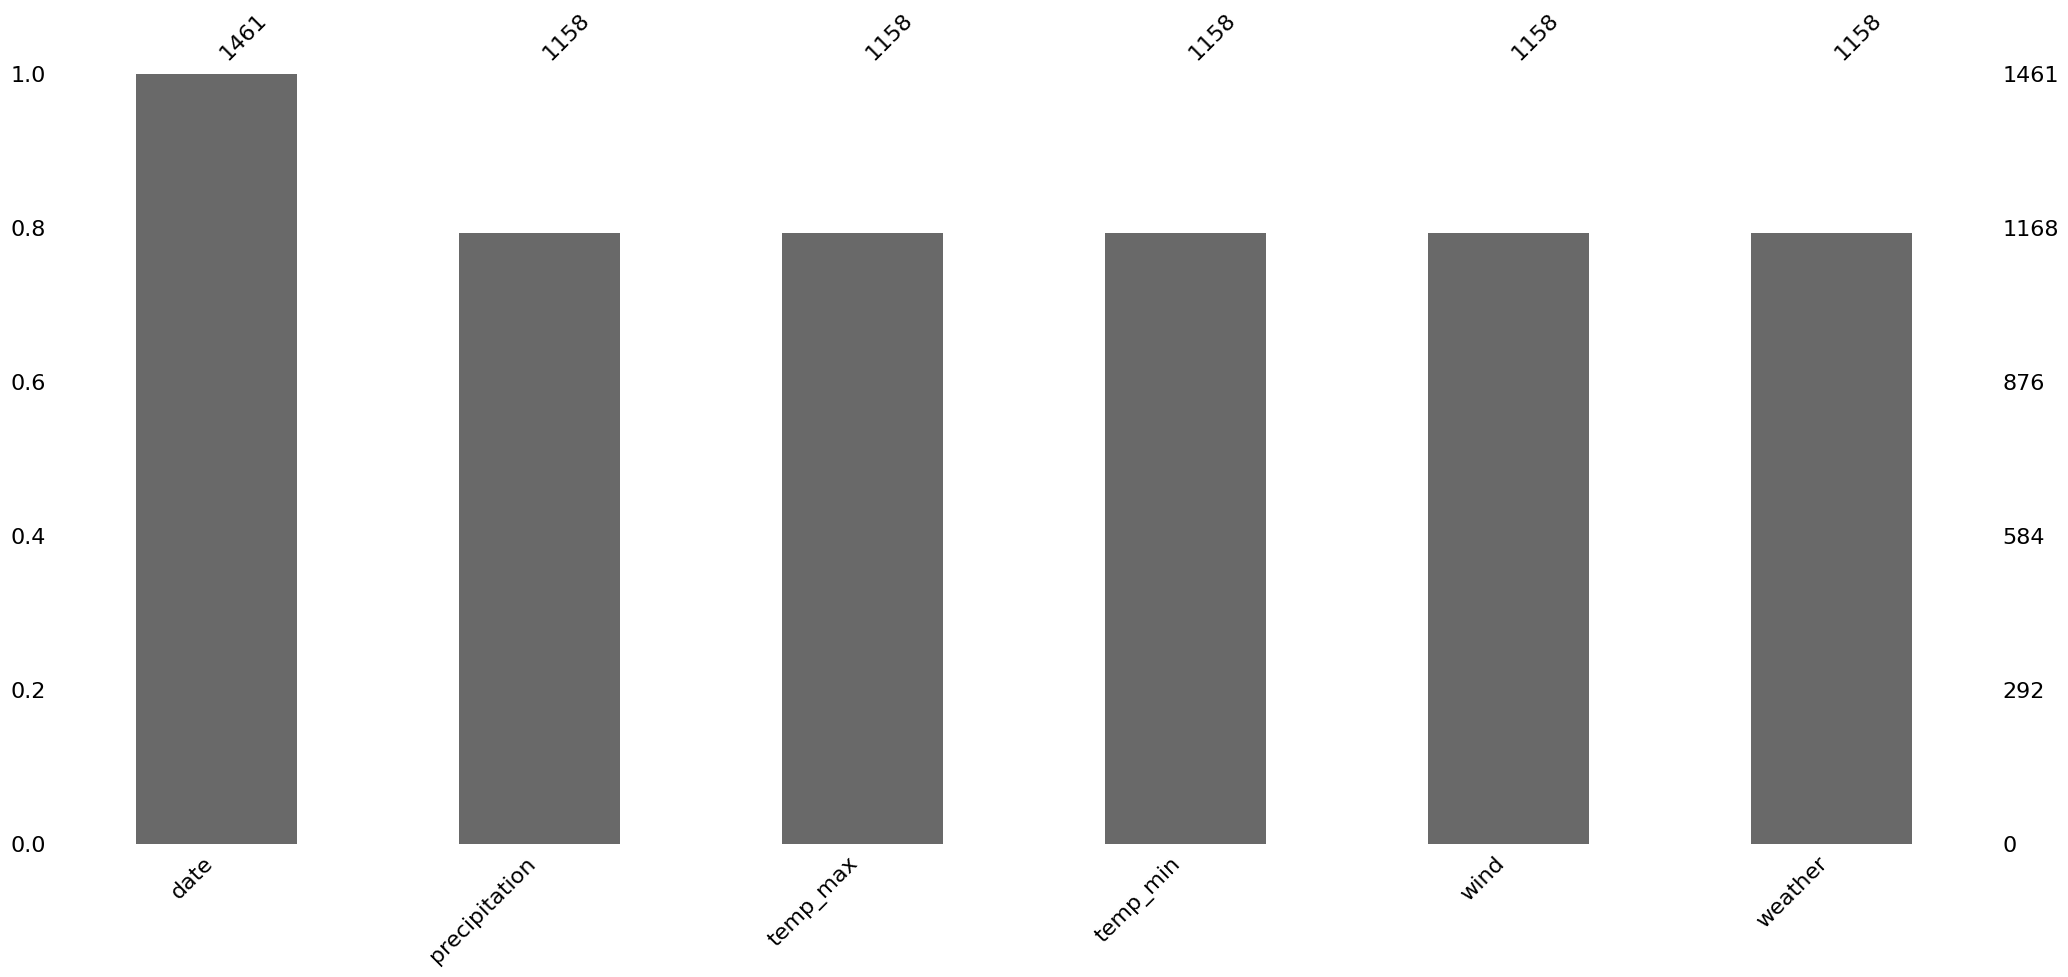

In [14]:
# 通过missingno条形图展示缺失值
df = pd.read_csv("../data/weather_withna.csv")
missingno.bar(df)

# 4.剔除缺失值

In [15]:
# Series剔除缺失值
s = pd.Series([1, pd.NA, None])
s

0       1
1    <NA>
2    None
dtype: object

In [16]:
s.dropna()

0    1
dtype: object

In [17]:
# DataFrame剔除缺失值
df = pd.DataFrame([[1, pd.NA, 2], [2, 3, 5], [pd.NA, 4, 6]])
df

,0,1,2
0,1,<NA>,2
1,2,3,5
2,<NA>,4,6


In [18]:
df.dropna()

,0,1,2
1,2,3,5


In [19]:
df = pd.DataFrame([[1, pd.NA, 2], [2, 3, 5], [pd.NA, 4, 6]])
df

,0,1,2
0,1,<NA>,2
1,2,3,5
2,<NA>,4,6


In [20]:
df.dropna(axis=1)

,2
0,2
1,5
2,6


In [21]:
df = pd.DataFrame([[1, pd.NA, 2], [pd.NA, pd.NA, 5], [pd.NA, pd.NA, pd.NA]])
df

,0,1,2
0,1,<NA>,2
1,<NA>,<NA>,5
2,<NA>,<NA>,<NA>


In [22]:
df.dropna(how="all") #如果所有值都是缺失值,则删除这一行

,0,1,2
0,1,<NA>,2
1,<NA>,<NA>,5


In [23]:
df.dropna(thresh=2) # 如果至少有2个值不是缺失值,则保留这一行

,0,1,2
0,1,<NA>,2


In [26]:
df.dropna(subset=[2]) # 如果2列有缺失值,则删除这一行

,0,1,2
0,1,<NA>,2
1,<NA>,<NA>,5


In [25]:
df

,0,1,2
0,1,<NA>,2
1,<NA>,<NA>,5
2,<NA>,<NA>,<NA>


# 5.填充缺失值

In [27]:
df = pd.read_csv("../data/weather_withna.csv")
df.tail(5)

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,NaN,NaN,NaN,NaN,NaN
1457,2015-12-28,NaN,NaN,NaN,NaN,NaN
1458,2015-12-29,NaN,NaN,NaN,NaN,NaN
1459,2015-12-30,NaN,NaN,NaN,NaN,NaN
1460,2015-12-31,20.6,12.2,5.0,3.8,rain


In [28]:
# 通过fillna()方法，传入值或字典进行填充
df.fillna(0).tail(5)

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,0.0,0.0,0.0,0.0,0
1457,2015-12-28,0.0,0.0,0.0,0.0,0
1458,2015-12-29,0.0,0.0,0.0,0.0,0
1459,2015-12-30,0.0,0.0,0.0,0.0,0
1460,2015-12-31,20.6,12.2,5.0,3.8,rain


In [29]:
df.fillna({"temp_max": 60, "temp_min": -60}).tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,NaN,60.0,-60.0,NaN,NaN
1457,2015-12-28,NaN,60.0,-60.0,NaN,NaN
1458,2015-12-29,NaN,60.0,-60.0,NaN,NaN
1459,2015-12-30,NaN,60.0,-60.0,NaN,NaN
1460,2015-12-31,20.6,12.2,5.0,3.8,rain


In [30]:
# 通过fillna()方法，传入统计后的值进行填充
df.fillna(df[["precipitation", "temp_max", "temp_min", "wind"]].mean()).tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,3.052332,15.851468,7.877202,3.242055,NaN
1457,2015-12-28,3.052332,15.851468,7.877202,3.242055,NaN
1458,2015-12-29,3.052332,15.851468,7.877202,3.242055,NaN
1459,2015-12-30,3.052332,15.851468,7.877202,3.242055,NaN
1460,2015-12-31,20.600000,12.200000,5.000000,3.800000,rain


In [31]:
# 通过ffill()或bfill()方法使用前面或后面的有效值填充
df.ffill().tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,0.0,11.1,4.4,4.8,sun
1457,2015-12-28,0.0,11.1,4.4,4.8,sun
1458,2015-12-29,0.0,11.1,4.4,4.8,sun
1459,2015-12-30,0.0,11.1,4.4,4.8,sun
1460,2015-12-31,20.6,12.2,5.0,3.8,rain


In [32]:
df.bfill().tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,20.6,12.2,5.0,3.8,rain
1457,2015-12-28,20.6,12.2,5.0,3.8,rain
1458,2015-12-29,20.6,12.2,5.0,3.8,rain
1459,2015-12-30,20.6,12.2,5.0,3.8,rain
1460,2015-12-31,20.6,12.2,5.0,3.8,rain


In [33]:
# 通过线性插值填充
s = pd.Series([1, np.nan, 3, 4, np.nan, 6])
s

0    1.0
1    NaN
2    3.0
3    4.0
4    NaN
5    6.0
dtype: float64

In [34]:
s.interpolate()

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    6.0
dtype: float64